# Dataset Preprocessing

## Load data 
reference from https://www.kaggle.com/code/jaysabnis/new-york-trip-duration-beginner-friendly-approach

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

dataset = np.load("data/nyc_taxi_data.npy", allow_pickle=True).item()
X_train, y_train, X_test, y_test = dataset["X_train"], dataset["y_train"], dataset["X_test"], dataset["y_test"]

In [2]:
X_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
879655,id2425795,1,2016-01-08 23:55:11,2016-01-09 00:04:32,1,-73.955551,40.773346,-73.973640,40.763500,N
646838,id0767831,2,2016-03-05 09:52:06,2016-03-05 10:00:12,1,-73.962181,40.763599,-73.980377,40.764919,N
1138713,id0449104,1,2016-04-09 16:03:53,2016-04-09 16:21:22,1,-73.977486,40.751842,-74.011688,40.718925,N
864716,id3030157,1,2016-01-06 11:12:44,2016-01-06 11:19:49,1,-73.970001,40.762363,-73.963264,40.774666,N
434927,id1584885,1,2016-06-26 09:10:56,2016-06-26 09:17:44,1,-73.950348,40.771561,-73.968178,40.762409,N


In [3]:
y_train.head()

879655      561
646838      486
1138713    1049
864716      425
434927      408
Name: trip_duration, dtype: int64

#### Check for null values in the data

In [4]:
train_df = pd.DataFrame(X_train)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1312779 entries, 879655 to 121958
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1312779 non-null  object 
 1   vendor_id           1312779 non-null  int64  
 2   pickup_datetime     1312779 non-null  object 
 3   dropoff_datetime    1312779 non-null  object 
 4   passenger_count     1312779 non-null  int64  
 5   pickup_longitude    1312779 non-null  float64
 6   pickup_latitude     1312779 non-null  float64
 7   dropoff_longitude   1312779 non-null  float64
 8   dropoff_latitude    1312779 non-null  float64
 9   store_and_fwd_flag  1312779 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 110.2+ MB


In [5]:
train_non_df = train_df.isnull().any()
train_non_df

id                    False
vendor_id             False
pickup_datetime       False
dropoff_datetime      False
passenger_count       False
pickup_longitude      False
pickup_latitude       False
dropoff_longitude     False
dropoff_latitude      False
store_and_fwd_flag    False
dtype: bool

### Exploration

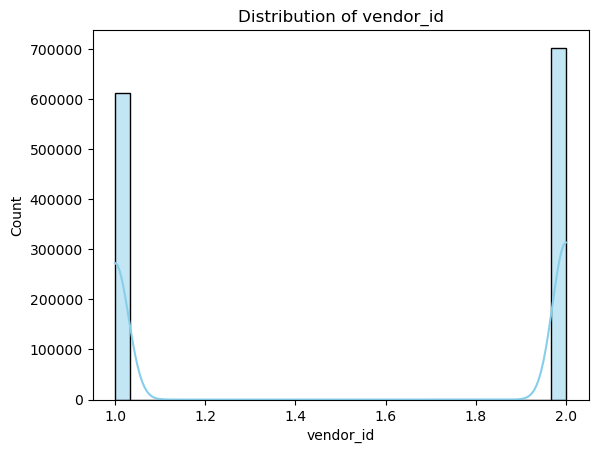

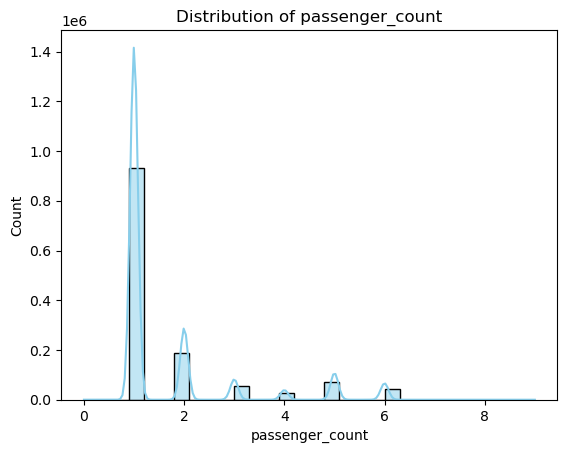

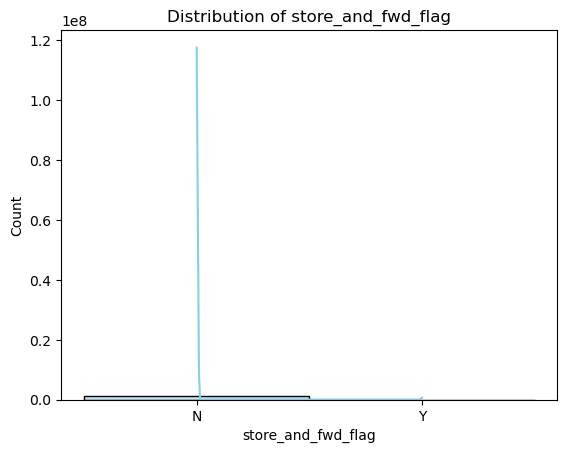

In [6]:
fields = ['vendor_id','passenger_count','store_and_fwd_flag']
for field in fields:
    sns.histplot(x= train_df[field],bins=30, kde=True, color='skyblue')
    plt.title(f"Distribution of {field}")
    plt.show()

### add trip_duration to X data 

In [7]:
y_train_df = pd.DataFrame(y_train)
train_df['trip_duration']=y_train_df['trip_duration']
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
879655,id2425795,1,2016-01-08 23:55:11,2016-01-09 00:04:32,1,-73.955551,40.773346,-73.973640,40.763500,N,561
646838,id0767831,2,2016-03-05 09:52:06,2016-03-05 10:00:12,1,-73.962181,40.763599,-73.980377,40.764919,N,486
1138713,id0449104,1,2016-04-09 16:03:53,2016-04-09 16:21:22,1,-73.977486,40.751842,-74.011688,40.718925,N,1049
864716,id3030157,1,2016-01-06 11:12:44,2016-01-06 11:19:49,1,-73.970001,40.762363,-73.963264,40.774666,N,425
434927,id1584885,1,2016-06-26 09:10:56,2016-06-26 09:17:44,1,-73.950348,40.771561,-73.968178,40.762409,N,408


### Preprocessing

1. Calculate distance by latitude and longitude


In [8]:
transform_train_data = train_df.copy()
transform_train_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
879655,id2425795,1,2016-01-08 23:55:11,2016-01-09 00:04:32,1,-73.955551,40.773346,-73.973640,40.763500,N,561
646838,id0767831,2,2016-03-05 09:52:06,2016-03-05 10:00:12,1,-73.962181,40.763599,-73.980377,40.764919,N,486
1138713,id0449104,1,2016-04-09 16:03:53,2016-04-09 16:21:22,1,-73.977486,40.751842,-74.011688,40.718925,N,1049
864716,id3030157,1,2016-01-06 11:12:44,2016-01-06 11:19:49,1,-73.970001,40.762363,-73.963264,40.774666,N,425
434927,id1584885,1,2016-06-26 09:10:56,2016-06-26 09:17:44,1,-73.950348,40.771561,-73.968178,40.762409,N,408
...,...,...,...,...,...,...,...,...,...,...,...
259178,id1753868,2,2016-03-25 07:11:49,2016-03-25 07:33:10,2,-73.955032,40.777328,-74.006203,40.749424,N,1281
1414414,id2204747,1,2016-02-16 18:01:45,2016-02-16 18:15:38,1,-73.973618,40.763920,-73.983849,40.749874,N,833
131932,id3043606,2,2016-01-26 19:22:29,2016-01-26 19:43:54,1,-74.006195,40.734283,-73.949608,40.785282,N,1285
671155,id1458584,1,2016-01-19 11:53:47,2016-01-19 12:00:16,1,-73.962341,40.767323,-73.969757,40.768669,N,389


In [9]:

def get_distance(lat1,lon1,lat2,lon2):
    # Calculate distance by latitude and longitude
    
    lat1,lon1,lat2,lon2 = map(math.radians,[lat1,lon1,lat2,lon2])
    dlat = lat1 - lat1
    dlon = lon1 - lon2
    
    # Haversine
    a = math.sin(dlat/2)**2 + math.cos(lat1)* math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a),math.sqrt(1-a))
    R = 6371  # Radius of the Earth in kilometers
    distance = R * c
    
    return distance

    


2. Extracte the time,month and day of the week from datetime

In [10]:

transform_train_data['pickup_datetime'] = pd.to_datetime(transform_train_data['pickup_datetime'])
transform_train_data.loc[:,'pickup_weekday'] = transform_train_data['pickup_datetime'].dt.dayofweek
transform_train_data.loc[:,'pickup_time'] = transform_train_data['pickup_datetime'].dt.hour
transform_train_data.loc[:,'pickup_date'] = transform_train_data['pickup_datetime'].dt.day
transform_train_data.loc[:,'pickup_month'] = transform_train_data['pickup_datetime'].dt.month
transform_train_data.loc[:,'store_and_fwd_flag'] = transform_train_data.store_and_fwd_flag.map({'N': 0, 'Y': 1})

#calculate pick up longitude deviation and latitude deviation
mean_longitude = np.mean(transform_train_data['pickup_longitude'])
mean_latitude = np.mean(transform_train_data['pickup_latitude'])
transform_train_data.loc[:,'long'] = transform_train_data['pickup_longitude']-mean_longitude
transform_train_data.loc[:,'lat'] = transform_train_data['pickup_latitude']-mean_latitude

#calculate trip distance
transform_train_data['distance']= transform_train_data.apply(
    lambda row: get_distance(row['pickup_latitude'],row['pickup_longitude'],
                             row['dropoff_latitude'],row['dropoff_longitude']),axis =1)
transform_train_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,pickup_time,pickup_date,pickup_month,long,lat,distance
879655,id2425795,1,2016-01-08 23:55:11,2016-01-09 00:04:32,1,-73.955551,40.773346,-73.973640,40.763500,0,561,4,23,8,1,0.017948,0.022419,1.523373
646838,id0767831,2,2016-03-05 09:52:06,2016-03-05 10:00:12,1,-73.962181,40.763599,-73.980377,40.764919,0,486,5,9,5,3,0.011318,0.012673,1.532464
1138713,id0449104,1,2016-04-09 16:03:53,2016-04-09 16:21:22,1,-73.977486,40.751842,-74.011688,40.718925,0,1049,5,16,9,4,-0.003986,0.000916,2.881768
864716,id3030157,1,2016-01-06 11:12:44,2016-01-06 11:19:49,1,-73.970001,40.762363,-73.963264,40.774666,0,425,2,11,6,1,0.003498,0.011437,0.567329
434927,id1584885,1,2016-06-26 09:10:56,2016-06-26 09:17:44,1,-73.950348,40.771561,-73.968178,40.762409,0,408,6,9,26,6,0.023152,0.020634,1.501560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,id1753868,2,2016-03-25 07:11:49,2016-03-25 07:33:10,2,-73.955032,40.777328,-74.006203,40.749424,0,1281,4,7,25,3,0.018467,0.026402,4.309589
1414414,id2204747,1,2016-02-16 18:01:45,2016-02-16 18:15:38,1,-73.973618,40.763920,-73.983849,40.749874,0,833,1,18,16,2,-0.000118,0.012993,0.861745
131932,id3043606,2,2016-01-26 19:22:29,2016-01-26 19:43:54,1,-74.006195,40.734283,-73.949608,40.785282,0,1285,1,19,26,1,-0.032696,-0.016643,4.766057
671155,id1458584,1,2016-01-19 11:53:47,2016-01-19 12:00:16,1,-73.962341,40.767323,-73.969757,40.768669,0,389,1,11,19,1,0.011158,0.016396,0.624516


## Removing anomalous data from the training dataset

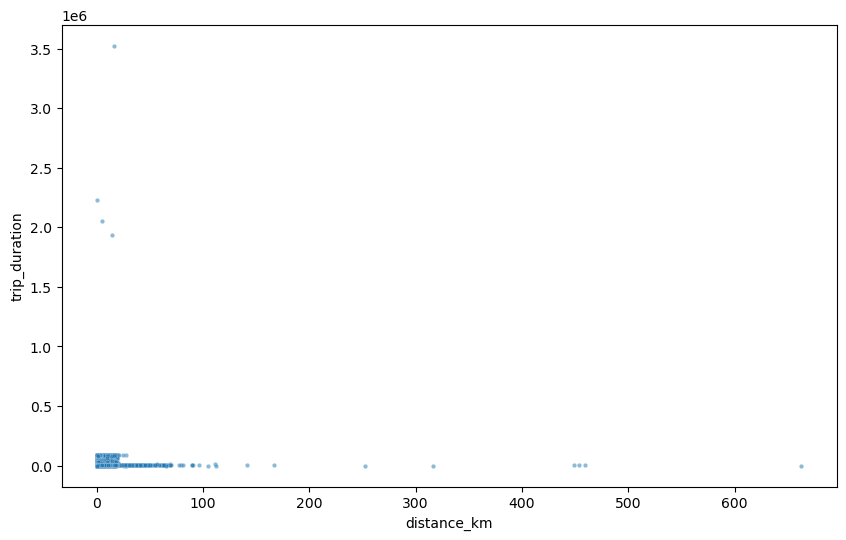

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(x =transform_train_data['distance'],y= transform_train_data['trip_duration'],s = 10,alpha=0.5 ,linewidths=0.2,edgecolors='w')
plt.xlabel("distance_km")
plt.ylabel("trip_duration")
plt.show()

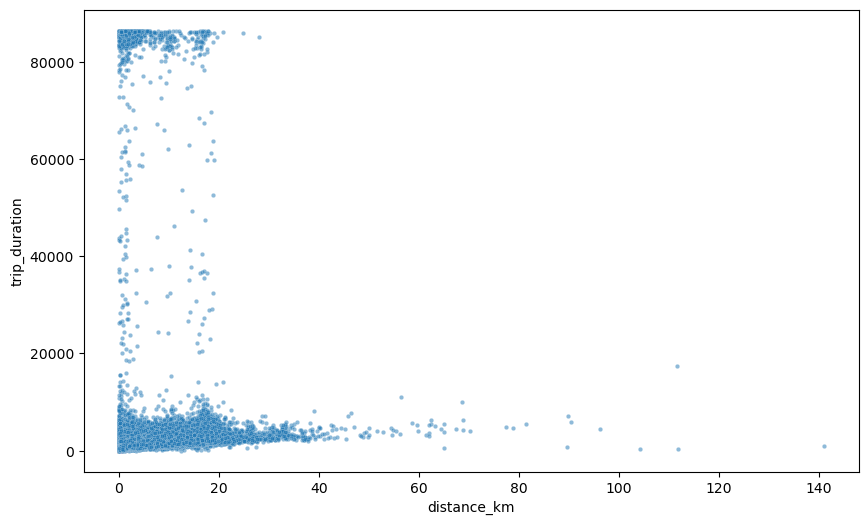

In [12]:
transform_train_data_1=transform_train_data[(transform_train_data['distance']<150) & (transform_train_data['trip_duration']<120000)]
plt.figure(figsize=(10,6))
plt.scatter(x =transform_train_data_1['distance'],y= transform_train_data_1['trip_duration'],s = 10,alpha=0.5 ,linewidths=0.2,edgecolors='w')
plt.xlabel("distance_km")
plt.ylabel("trip_duration")
plt.show()

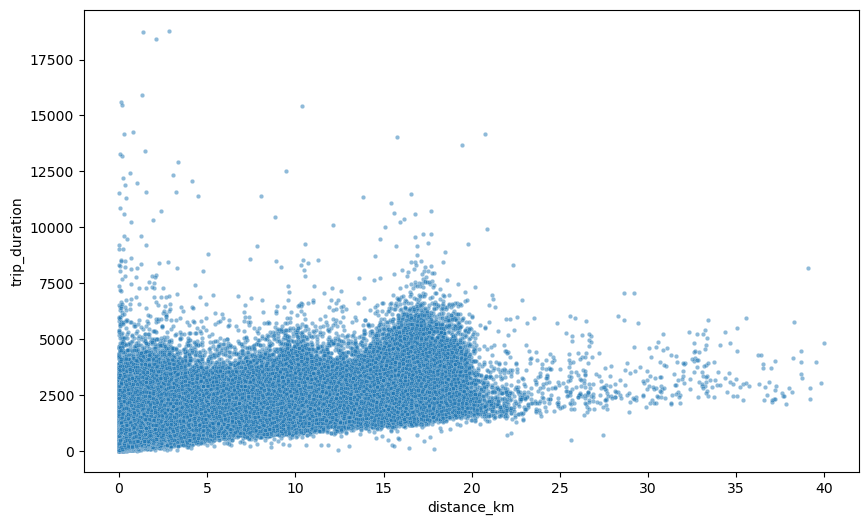

In [13]:
transform_train_data_1=transform_train_data[(transform_train_data['distance']<40) & (transform_train_data['trip_duration']<20000)]
plt.figure(figsize=(10,6))
plt.scatter(x =transform_train_data_1['distance'],y= transform_train_data_1['trip_duration'],s = 10,alpha=0.5 ,linewidths=0.2,edgecolors='w')
plt.xlabel("distance_km")
plt.ylabel("trip_duration")
plt.show()

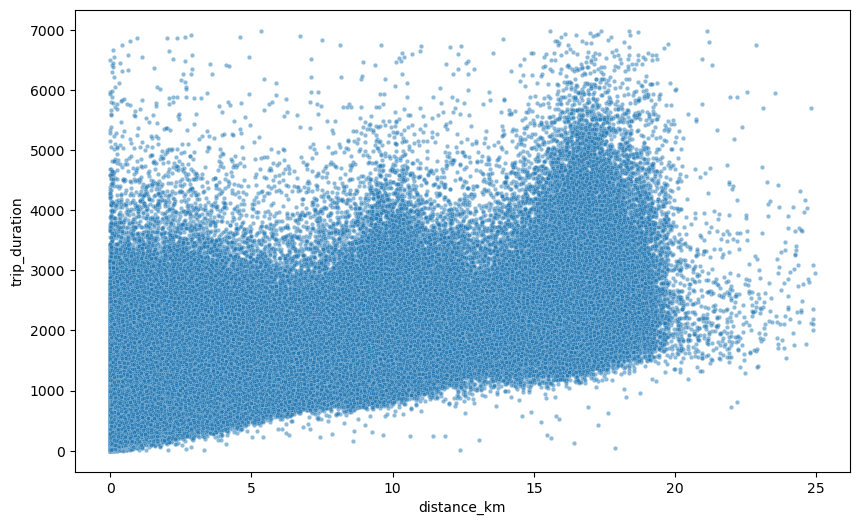

In [14]:
transform_train_data_2=transform_train_data[(transform_train_data['distance']<25) & (transform_train_data['trip_duration']<7000)]
plt.figure(figsize=(10,6))
plt.scatter(x =transform_train_data_2['distance'],y= transform_train_data_2['trip_duration'],s = 10,alpha=0.5 ,linewidths=0.2,edgecolors='w')
plt.xlabel("distance_km")
plt.ylabel("trip_duration")
plt.show()

####  From the above graph, we can see a lot of anomalous data, such as the distance is greater than 25km or trip_duration is greater than 7000 seconds, so we will remove this part of the anomalous data during the actual training.

In [15]:
transform_train_data_3=transform_train_data[(transform_train_data['distance']>25) | (transform_train_data['trip_duration']>8000)]


In [16]:
print(transform_train_data_3['vendor_id'].value_counts())
print(transform_train_data_2['vendor_id'].value_counts())

vendor_id
2    2115
1     214
Name: count, dtype: int64
vendor_id
2    700023
1    610362
Name: count, dtype: int64


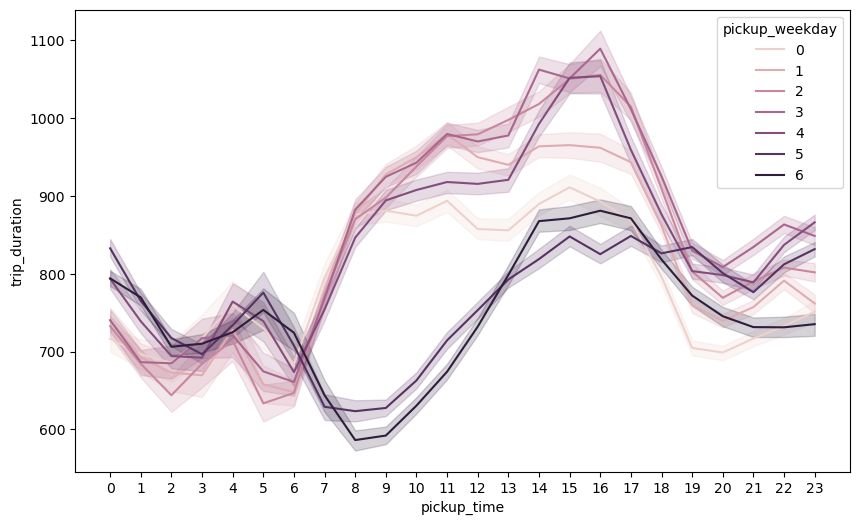

In [17]:
plt.figure(figsize=(10,6))

sns.lineplot(x="pickup_time",y="trip_duration",data=transform_train_data_2,hue="pickup_weekday")
hourly_ticks = range(0,24)
plt.xticks(hourly_ticks)
plt.xlabel("pickup_time")
plt.ylabel("trip_duration")

plt.show()

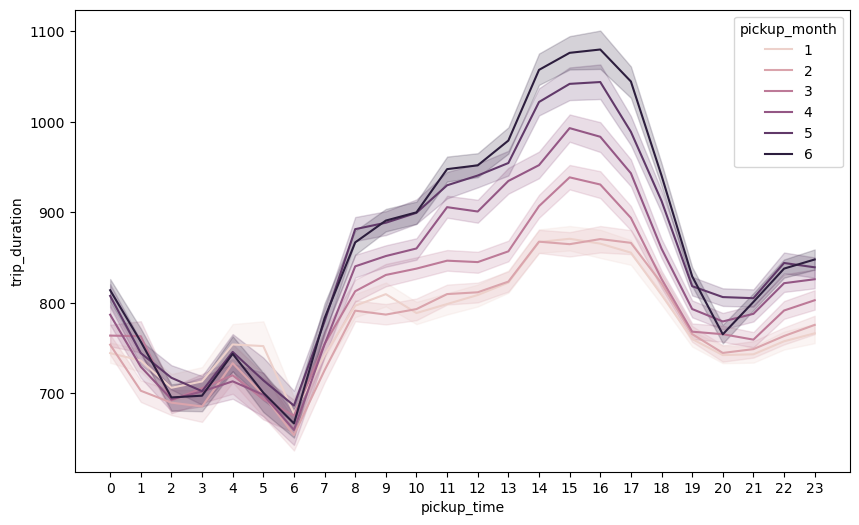

In [18]:
plt.figure(figsize=(10,6))

sns.lineplot(x="pickup_time",y="trip_duration",data=transform_train_data_2,hue="pickup_month")
hourly_ticks = range(0,24)
plt.xticks(hourly_ticks)
plt.xlabel("pickup_time")
plt.ylabel("trip_duration")

plt.show()

D:\Software\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


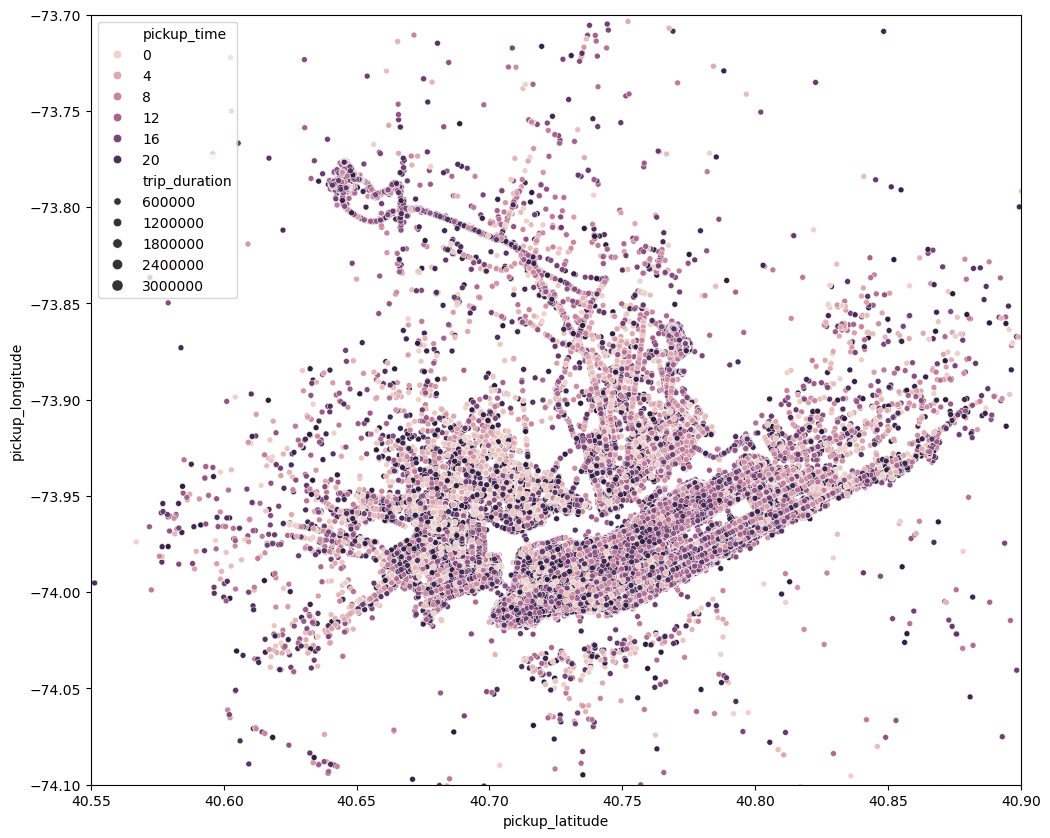

In [19]:
plt.figure(figsize=(12,10))

sns.scatterplot(x="pickup_latitude",y="pickup_longitude",data=transform_train_data,hue="pickup_time",size = 'trip_duration')
plt.xlim(40.55,40.9)
plt.ylim(-74.1, -73.7)
plt.xlabel("pickup_latitude")
plt.ylabel("pickup_longitude")
plt.show()

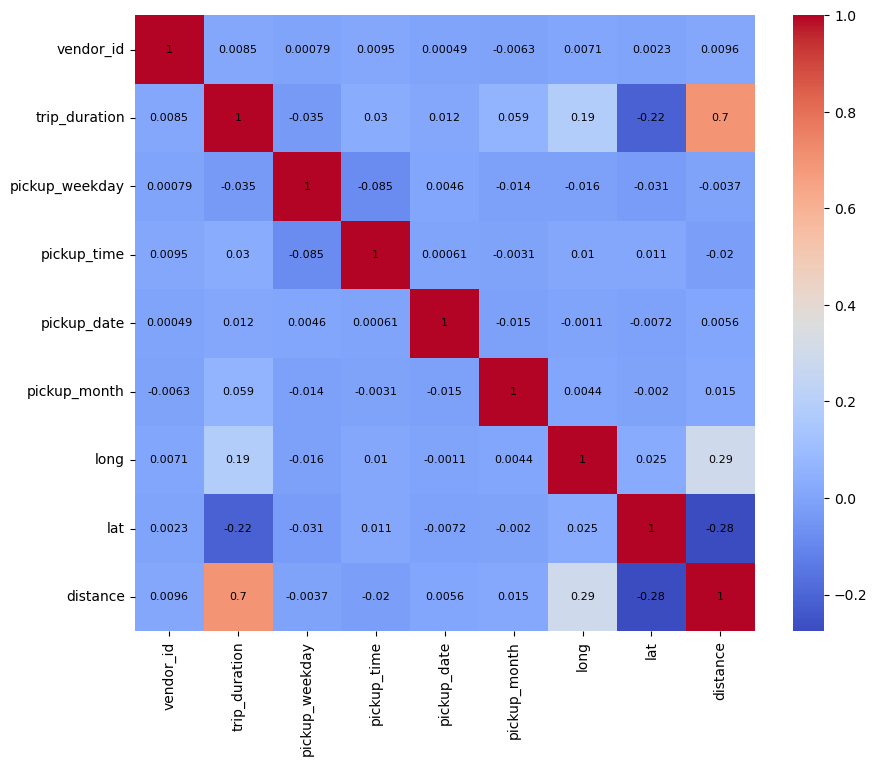

In [20]:
plt.figure(figsize=(10,8))
transform_train_data_4= transform_train_data_2.drop(["id","pickup_longitude", "pickup_latitude","dropoff_longitude", "dropoff_latitude", 'pickup_datetime', 'dropoff_datetime','passenger_count','store_and_fwd_flag'],
                        axis=1)
sns.heatmap(data = transform_train_data_4.corr(),annot = True, cmap= 'coolwarm', annot_kws={"size": 8, "color": "black"})
plt.show()

from the plot, we could find  that the trip duration has greater relationship to the **pickup_time**,**pickup_date** **pickup_weekday**,**distance** ,**long** and **la**.,SO we will choose these data as parameters for model

from observation,we find that trip_duration has high relation to **distance**

In [21]:
X_train_1= transform_train_data_2.drop(["id","trip_duration","vendor_id","pickup_longitude", "pickup_latitude","dropoff_longitude", "dropoff_latitude", 'pickup_datetime', 'dropoff_datetime','passenger_count','store_and_fwd_flag'],
                        axis=1)
X_train_1.head()

,pickup_weekday,pickup_time,pickup_date,pickup_month,long,lat,distance
879655,4,23,8,1,0.017948,0.022419,1.523373
646838,5,9,5,3,0.011318,0.012673,1.532464
1138713,5,16,9,4,-0.003986,0.000916,2.881768
864716,2,11,6,1,0.003498,0.011437,0.567329
434927,6,9,26,6,0.023152,0.020634,1.501560
